This project can be found on the github project page [**bigfive_patterns**](https://github.com/TobiasNikolaisen/bigfive_patterns).

In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from pathlib import Path

In [2]:
# Define base directory
base_dir = Path("/Users/tobiasnikolaisen/Documents/Github/HEL8048/bigfive_patterns")

In [3]:
# Load the data
df = pd.read_csv(base_dir / "data" / "merged_output.csv")

In [4]:
# Helpful functions
def get_name(row, fallback_id):
    return row["name"] if "name" in row and pd.notnull(row["name"]) else f"ID {fallback_id}"

def safe_filename(name):
    base = "_".join(str(name).split())
    return "".join(c if c.isalnum() or c in "_-" else "_" for c in base)

def compare_two_individuals(row1, row2, output_path):
    name1 = get_name(row1, row1["id"])
    name2 = get_name(row2, row2["id"])
    comparison_df = pd.DataFrame({
        "Trait": main_traits,
        name1: row1[main_traits].values,
        name2: row2[main_traits].values
    })
    safe_name1 = safe_filename(name1)
    safe_name2 = safe_filename(name2)
    filename = output_path / f"{safe_name1}_vs_{safe_name2}.png"
    comparison_df.set_index("Trait").plot(kind="bar", figsize=(7, 5), color=["midnightblue", "goldenrod"])
    plt.title(f"Comparison of {name1} and {name2}")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.xticks(ticks=np.arange(len(main_traits)), labels=[t.capitalize() for t in main_traits], rotation=15)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [5]:
# Output directories for later variables 
individual_dir = base_dir / "results" / "individual_personality_profiles"
validity_dir = base_dir / "results" / "validity_plots"
comparison_dir = base_dir / "results" / "comparing_two_individuals"
writers_dir = base_dir / "results" / "writers_vs_protagonists"
protagonists_dir = base_dir / "results" / "protagonists_patterns"

for path in [individual_dir, comparison_dir, writers_dir, protagonists_dir]:
    path.mkdir(parents=True, exist_ok=True)

The first thing we need to do, is to store the traits and facets in such a manner that it is easy to retrieve them later. We do this by making a dictionary that contains the facets of each trait as a list.

In [6]:
# STEP 1: Define the Big Five traits and their facets as used in the dataset
traits = {
    "extraversion": [
        "active", "assertive", "cheerful",
        "excitement_seeking", "outgoing", "gregariousness"
    ],
    "openness": [
        "adventurous", "artistic", "emotionally_aware",
        "imaginative", "intellectual", "authority_challenging"
    ],
    "conscientiousness": [
        "cautious", "disciplined", "dutiful",
        "achievement_striving", "orderliness", "self_efficacy"
    ],
    "neuroticism": [
        "melancholy", "self_conscious", "stress_prone",
        "fiery", "prone_to_worry", "immoderation"
    ],
    "agreeableness": [
        "cooperative", "trusting", "altruism",
        "modesty", "uncompromising", "sympathy"
    ]
}

main_traits = list(traits.keys())

Next we will plot the personality profiles for all individuals in the dataset. The plots can be found in the folder bigfive_patterns/results/individual_personality_profiles. This also provides a list of all the historical and fictional characters used in the dataset, along with their personality profiles. The personality profiles are saved as PNG files in the specified directory.

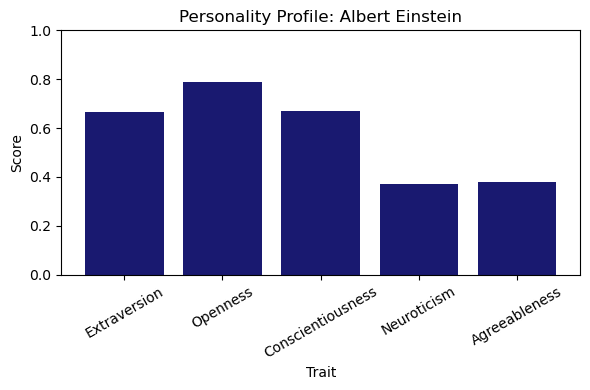

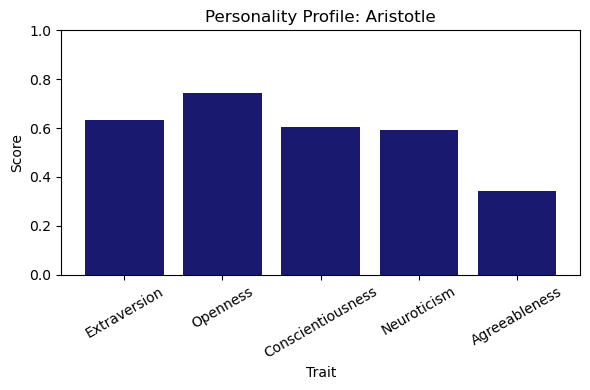

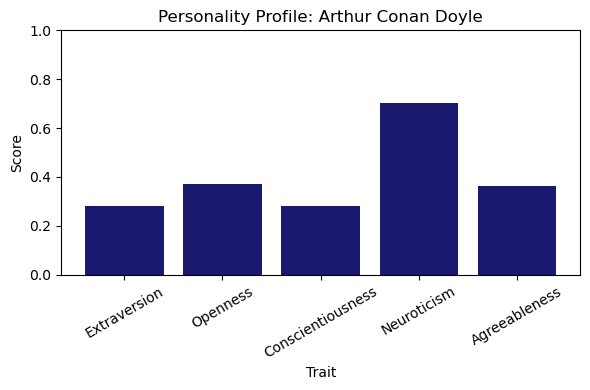

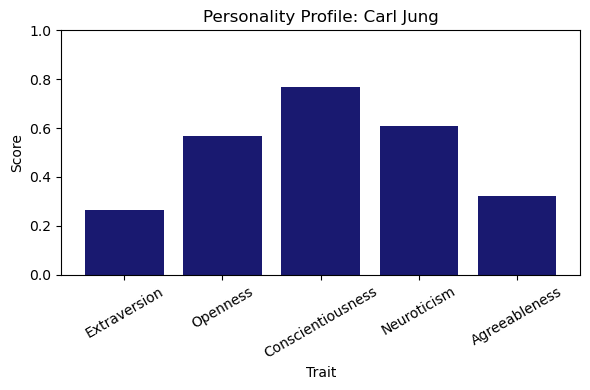

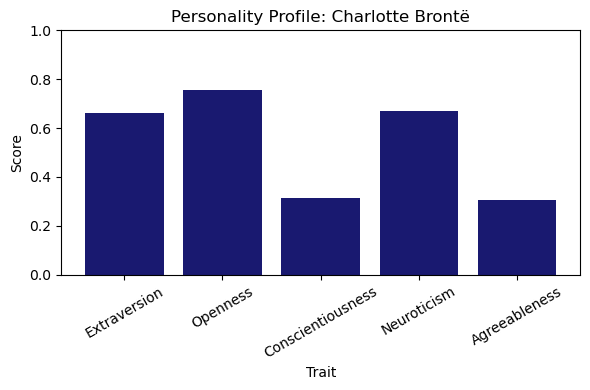

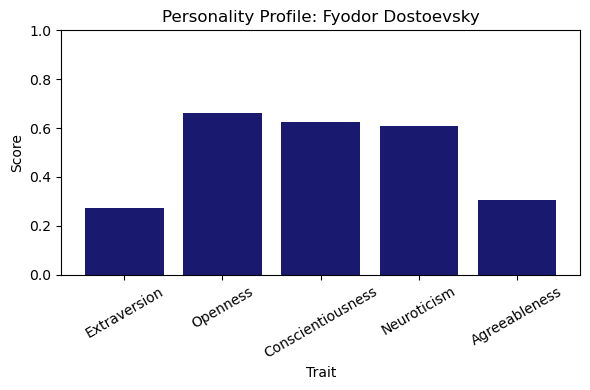

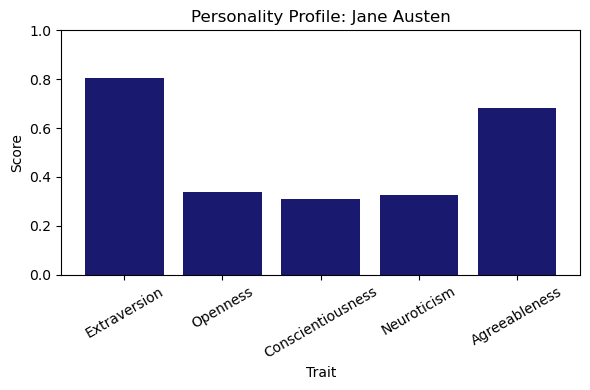

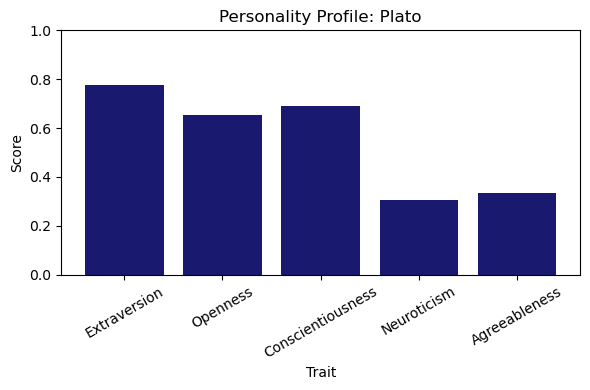

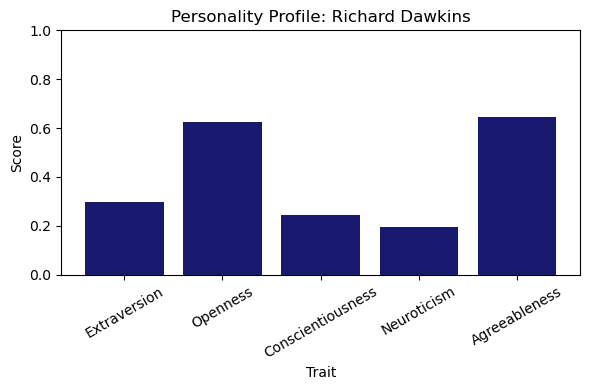

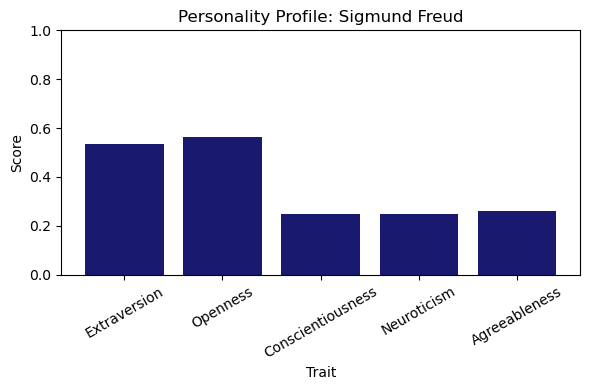

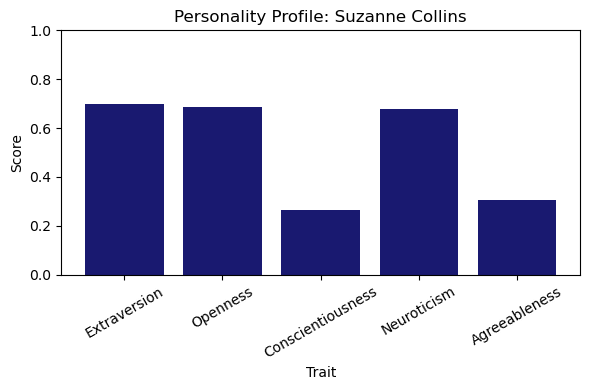

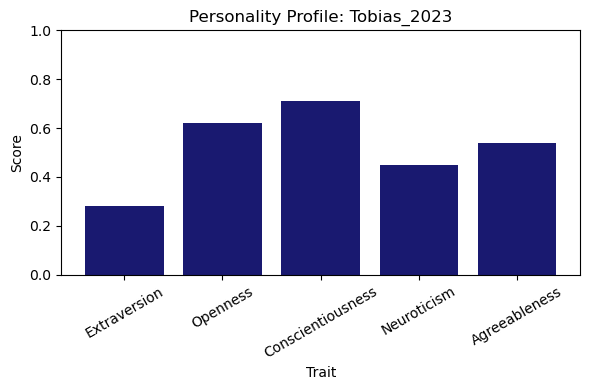

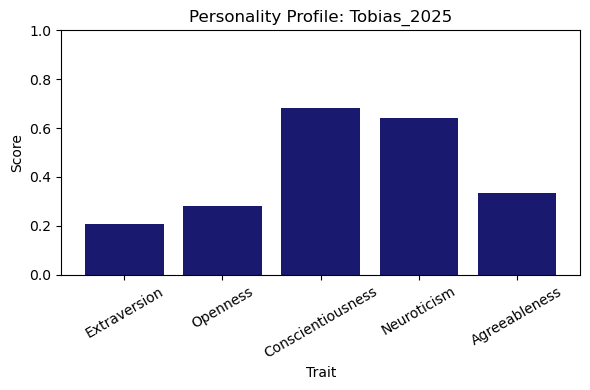

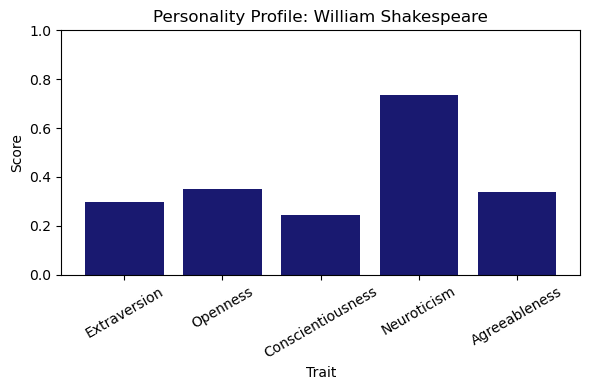

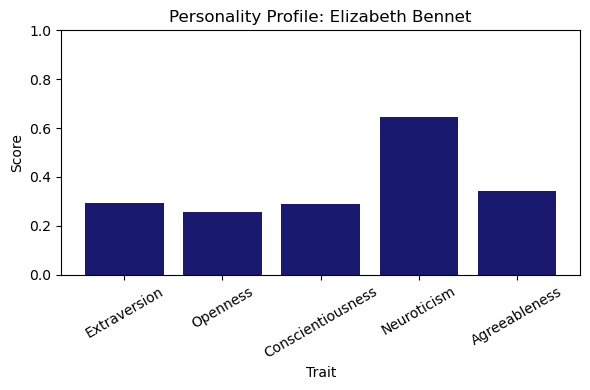

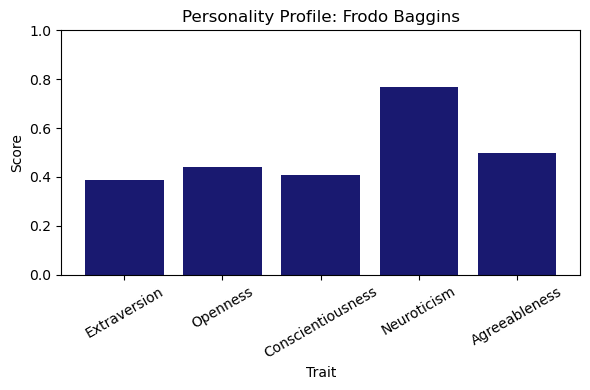

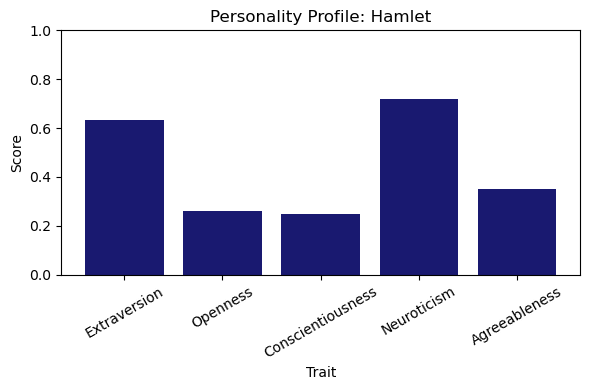

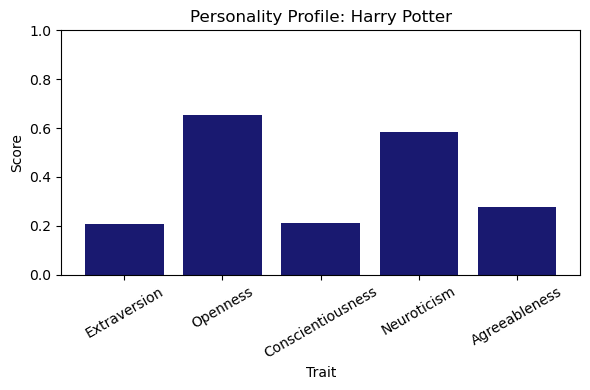

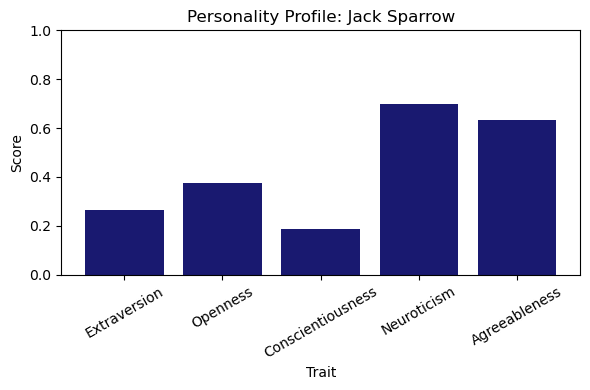

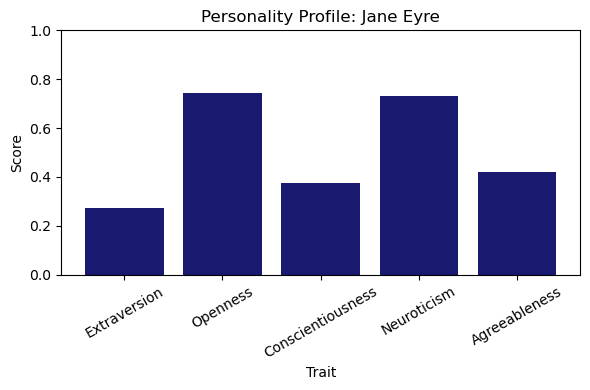

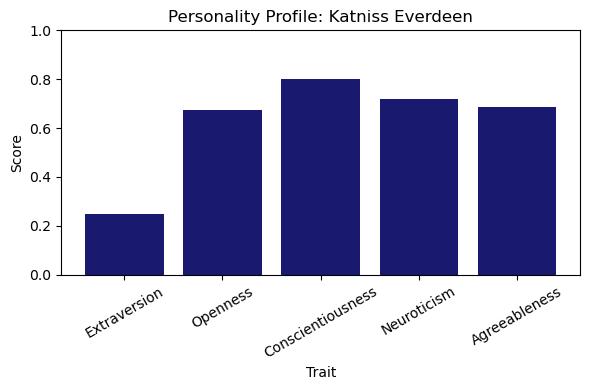

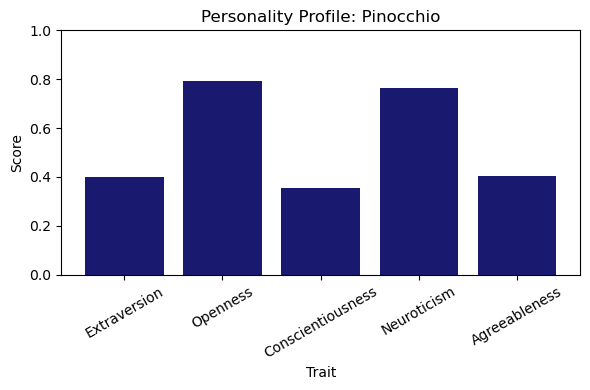

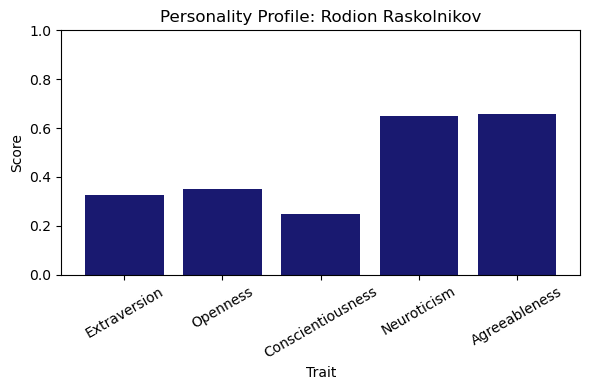

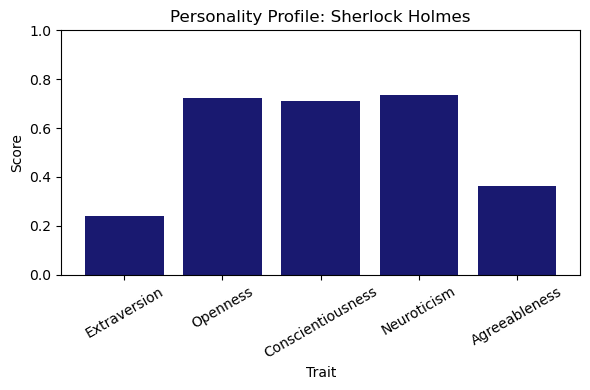

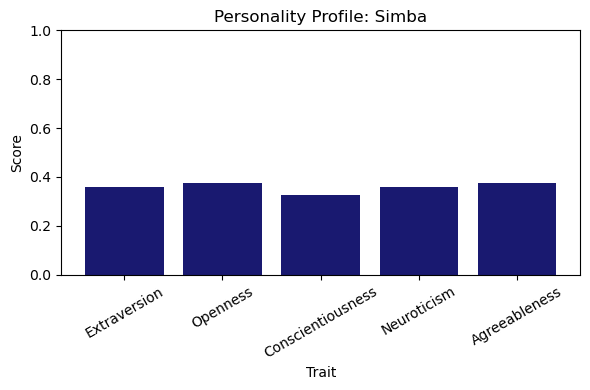

In [7]:
# Plot personality profiles for each individual in the dataset
def plot_individual_profile(row, output_path):
    name = get_name(row, row["id"])
    safe_name = safe_filename(name)
    filename = output_path / f"{safe_name}_profile.png"
    values = row[main_traits].values
    plt.figure(figsize=(6, 4))
    plt.bar(main_traits, values, color="midnightblue")
    plt.ylim(0, 1)
    plt.title(f"Personality Profile: {name}")
    plt.ylabel("Score")
    plt.xlabel("Trait")
    plt.xticks(ticks=range(len(main_traits)), labels=[t.capitalize() for t in main_traits], rotation=30)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

for _, row in df.iterrows():
    plot_individual_profile(row, individual_dir)

Now we need to check the validity of this personality test. This we will do by checking the correlations of the traits first. If the this is a valid personality test, we would expect to see correlation coefficients close to zero. If the coefficients are either positive or negative, this could indicate that this test is not measuring the traits in a valid manner. The plot for this can be found in bigfive_patterns/results/validity_plots.

Correlation matrix for main Big Five traits:
                   extraversion  openness  conscientiousness  neuroticism  \
extraversion           1.000000  0.160775          -0.079509    -0.360195   
openness               0.160775  1.000000           0.389313    -0.072191   
conscientiousness     -0.079509  0.389313           1.000000    -0.023523   
neuroticism           -0.360195 -0.072191          -0.023523     1.000000   
agreeableness         -0.113817 -0.180131          -0.043206    -0.102120   

                   agreeableness  
extraversion           -0.113817  
openness               -0.180131  
conscientiousness      -0.043206  
neuroticism            -0.102120  
agreeableness           1.000000  


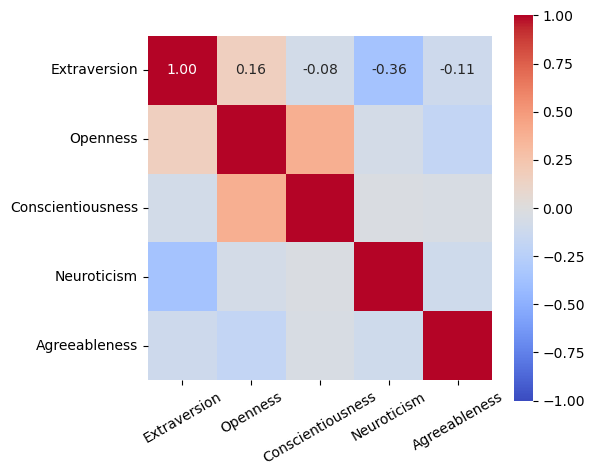

In [8]:
# STEP 2: Check for validity of the Big Five traits
main_trait_corr = df[main_traits].corr()

print("Correlation matrix for main Big Five traits:")
print(main_trait_corr)

plt.figure(figsize=(6, 5))
ax = sns.heatmap(main_trait_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True, vmin=-1, vmax=1)
ax.set_xticklabels([t.capitalize() for t in main_traits], rotation=30)
ax.set_yticklabels([t.capitalize() for t in main_traits], rotation=0)
plt.tight_layout()
plt.savefig(validity_dir / "main_trait_correlations.png")
plt.show()

From the output we can see that that most traits have coefficients close to zero, with the exception of openness-conscientiousness and extraversion-neuroticism. This means that we cannot say that the personality test by Symanto is valid, but for our purposes it will do reasonable.

Now we will check for validity within each trait's facets. If the measurement is giving us valid results, we would expect to see moderate, positive correlation coefficients for the facets.


Correlation matrix for Extraversion facets:
                      active  assertive  cheerful  excitement_seeking  \
active              1.000000   0.340721 -0.113463            0.077918   
assertive           0.340721   1.000000  0.101955            0.358501   
cheerful           -0.113463   0.101955  1.000000            0.502712   
excitement_seeking  0.077918   0.358501  0.502712            1.000000   
outgoing            0.349956   0.307992  0.032591            0.264500   
gregariousness      0.436489   0.063181 -0.161845            0.089780   

                    outgoing  gregariousness  
active              0.349956        0.436489  
assertive           0.307992        0.063181  
cheerful            0.032591       -0.161845  
excitement_seeking  0.264500        0.089780  
outgoing            1.000000       -0.036820  
gregariousness     -0.036820        1.000000  


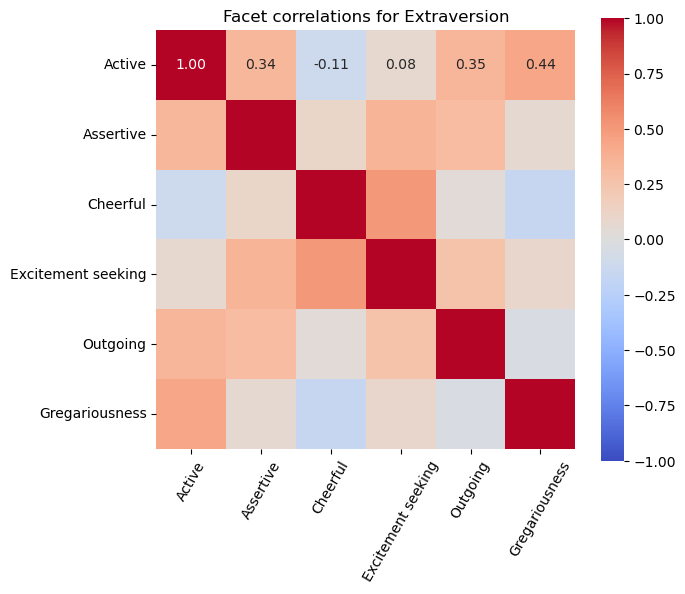


Correlation matrix for Openness facets:
                       adventurous  artistic  emotionally_aware  imaginative  \
adventurous               1.000000  0.276295           0.217001     0.075015   
artistic                  0.276295  1.000000          -0.094892     0.606438   
emotionally_aware         0.217001 -0.094892           1.000000    -0.069985   
imaginative               0.075015  0.606438          -0.069985     1.000000   
intellectual              0.165761  0.580515           0.257574     0.579975   
authority_challenging    -0.038558  0.326185          -0.057045     0.344957   

                       intellectual  authority_challenging  
adventurous                0.165761              -0.038558  
artistic                   0.580515               0.326185  
emotionally_aware          0.257574              -0.057045  
imaginative                0.579975               0.344957  
intellectual               1.000000               0.259595  
authority_challenging      0.259

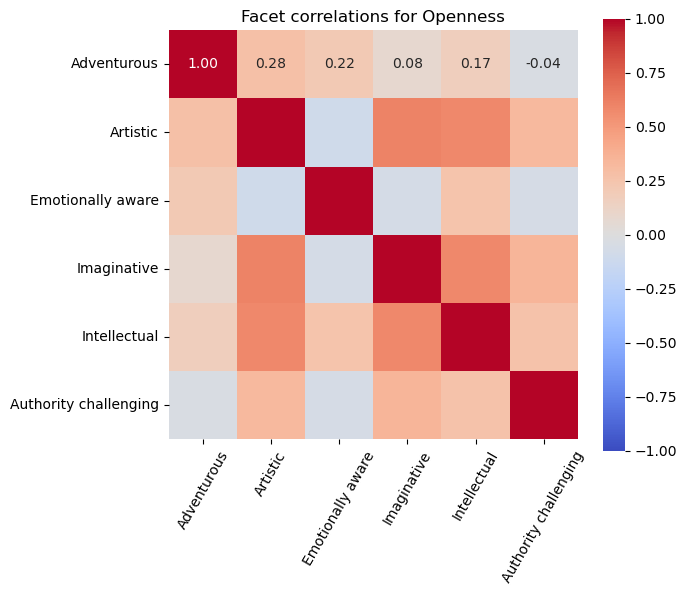


Correlation matrix for Conscientiousness facets:
                      cautious  disciplined   dutiful  achievement_striving  \
cautious              1.000000    -0.479020  0.313417             -0.128113   
disciplined          -0.479020     1.000000 -0.061989              0.154959   
dutiful               0.313417    -0.061989  1.000000              0.430510   
achievement_striving -0.128113     0.154959  0.430510              1.000000   
orderliness           0.140013     0.009362  0.180685              0.390885   
self_efficacy         0.030434     0.442552  0.402876              0.661465   

                      orderliness  self_efficacy  
cautious                 0.140013       0.030434  
disciplined              0.009362       0.442552  
dutiful                  0.180685       0.402876  
achievement_striving     0.390885       0.661465  
orderliness              1.000000       0.559487  
self_efficacy            0.559487       1.000000  


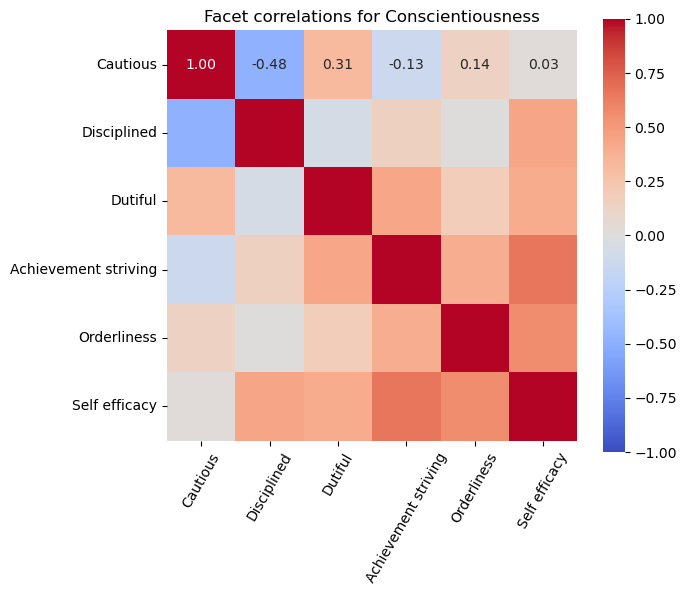


Correlation matrix for Neuroticism facets:
                melancholy  self_conscious  stress_prone     fiery  \
melancholy        1.000000        0.376532      0.212270  0.399166   
self_conscious    0.376532        1.000000      0.614918  0.017477   
stress_prone      0.212270        0.614918      1.000000  0.053131   
fiery             0.399166        0.017477      0.053131  1.000000   
prone_to_worry    0.355351        0.279953      0.206874  0.564312   
immoderation     -0.038022       -0.062153     -0.057397 -0.152492   

                prone_to_worry  immoderation  
melancholy            0.355351     -0.038022  
self_conscious        0.279953     -0.062153  
stress_prone          0.206874     -0.057397  
fiery                 0.564312     -0.152492  
prone_to_worry        1.000000     -0.133238  
immoderation         -0.133238      1.000000  


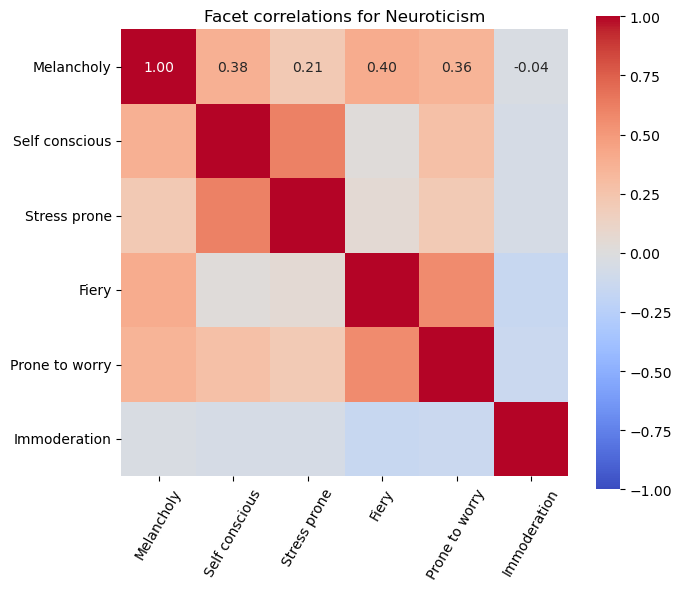


Correlation matrix for Agreeableness facets:
                cooperative  trusting  altruism   modesty  uncompromising  \
cooperative        1.000000  0.137741  0.141331  0.273123        0.140385   
trusting           0.137741  1.000000  0.082405 -0.160566       -0.158515   
altruism           0.141331  0.082405  1.000000  0.287301        0.188360   
modesty            0.273123 -0.160566  0.287301  1.000000       -0.191724   
uncompromising     0.140385 -0.158515  0.188360 -0.191724        1.000000   
sympathy           0.102165 -0.178254  0.106471  0.313298       -0.146636   

                sympathy  
cooperative     0.102165  
trusting       -0.178254  
altruism        0.106471  
modesty         0.313298  
uncompromising -0.146636  
sympathy        1.000000  


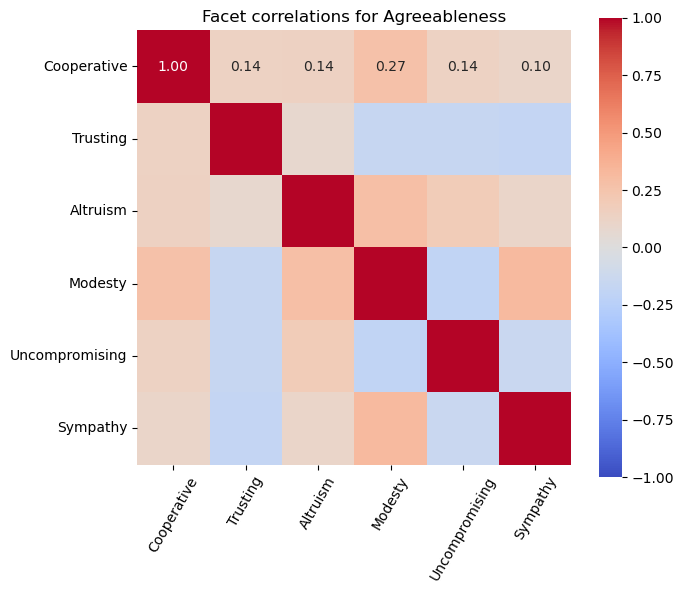

In [9]:
# STEP 3: Check for validity within each trait’s facets
for trait, facets in traits.items():
    facets_present = [f for f in facets if f in df.columns]
    if len(facets_present) <= 1:
        continue

    facet_data = df[facets_present]

    # Compute correlation matrix; NaNs occur for constant columns
    corr = facet_data.corr(numeric_only=True, method="pearson", min_periods=1)
    corr_display = corr.fillna(0)

    print(f"\nCorrelation matrix for {trait.title()} facets:")
    print(corr)

    plt.figure(figsize=(7, 6))
    sns.heatmap(corr_display, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True,
                vmin=-1, vmax=1)
    plt.title(f"Facet correlations for {trait.title()}")
    plt.xticks(ticks=np.arange(len(facets_present)) + 0.5, labels=[f.replace("_", " ").capitalize() for f in facets_present], rotation=60)
    plt.yticks(ticks=np.arange(len(facets_present)) + 0.5, labels=[f.replace("_", " ").capitalize() for f in facets_present], rotation=0)
    plt.tight_layout()
    plt.savefig(validity_dir / f"{trait}_facet_correlations.png")
    plt.show()

I will not go into too much detail, but there are a few worriesome correlations. Overall, it is looking like most facets do have a positive correlation coefficient to most other facets, which allows us to move forward with the analysis.

One last check we can do, is to see how it compares to an actual personality test. I have a personality test that I took in the Spring of 2023 as a part of the course Personality psychology. This allows us to compare how accurate it is compared a real test.

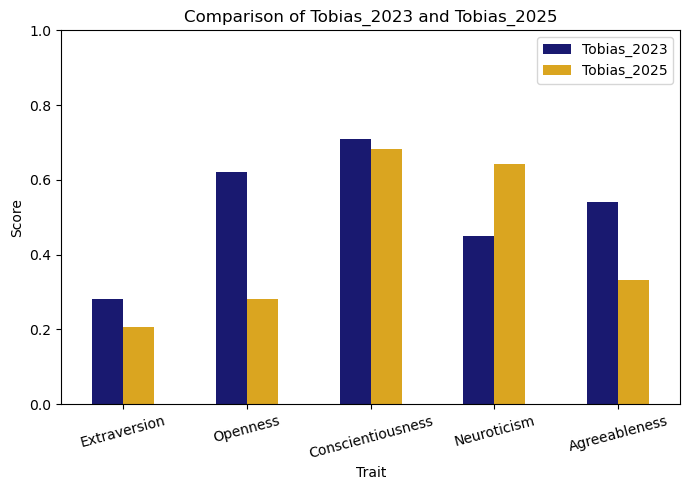

In [10]:
# STEP 4: Compare my test scores with that of Symanto API
id1, id2 = 12, 13
row1 = df[df["id"] == id1].squeeze()
row2 = df[df["id"] == id2].squeeze()
compare_two_individuals(row1, row2, validity_dir)

After seeing the output, it looks like it gives reasonably similar scores for extraversion and conscientousness, while it struggles with the other traits.
In conclusion, we cannot trust the results of this project as the psychometrics are below standard. Still, we might be able to pick up on interesting trends even though the scores might not be accurate.

Some pairs that famously had different temperaments are Sigmund Freud and Carl Jung, and Plato and Aristotle. The following plots show their personality profiles compared.

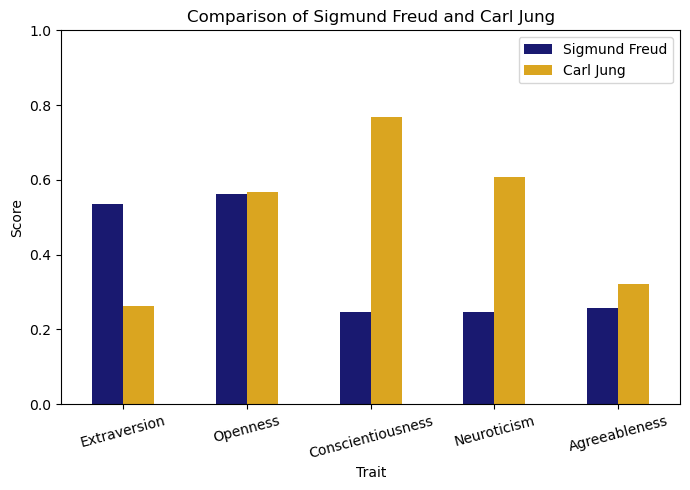

In [11]:
# Comparing pairs of historical interest

# Comparison of Freud and Jung
id1, id2 = 10, 4
row1 = df[df["id"] == id1].squeeze()
row2 = df[df["id"] == id2].squeeze()
compare_two_individuals(row1, row2, comparison_dir)

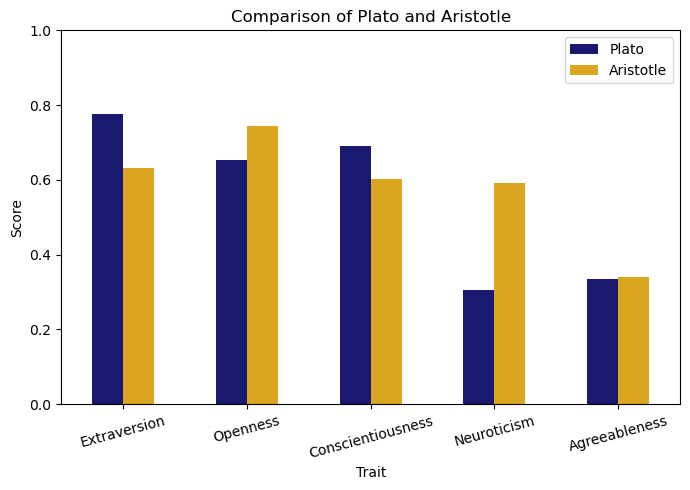

In [12]:
# Comparison of Plato and Aristotle
id1, id2 = 8, 2
row1 = df[df["id"] == id1].squeeze()
row2 = df[df["id"] == id2].squeeze()
compare_two_individuals(row1, row2, comparison_dir)

These and the following plots can be found in bigfive_patterns/results/comparing_two_individuals.
What we will do now is the main part of the analysis. We will first look at how writers persoanlity profiles compares with that of one of their protagonists. The question being "How much overlap will there be?"

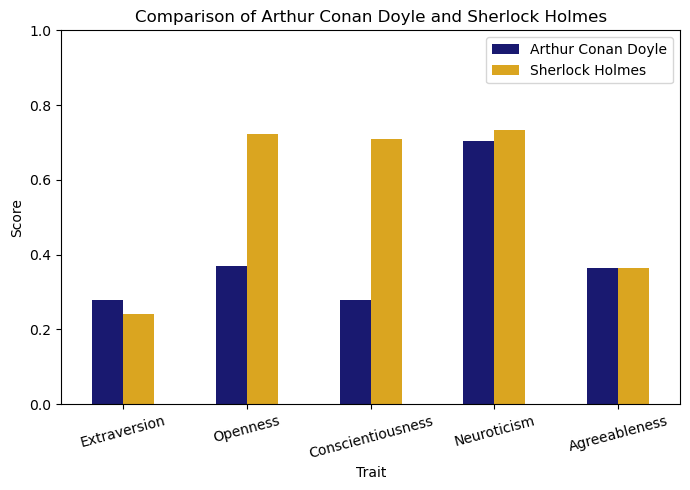

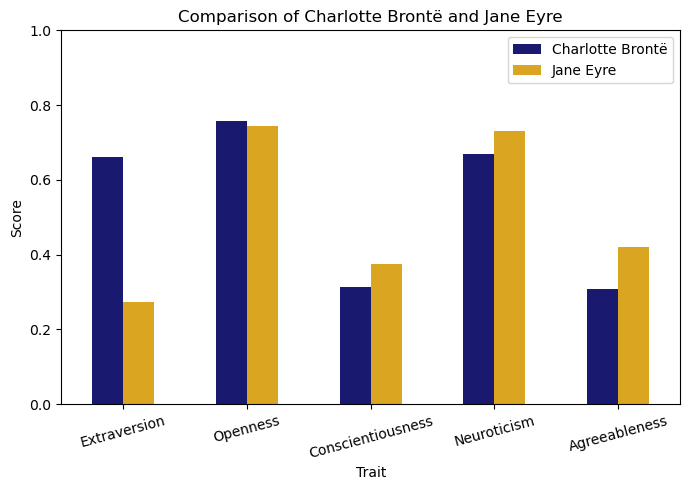

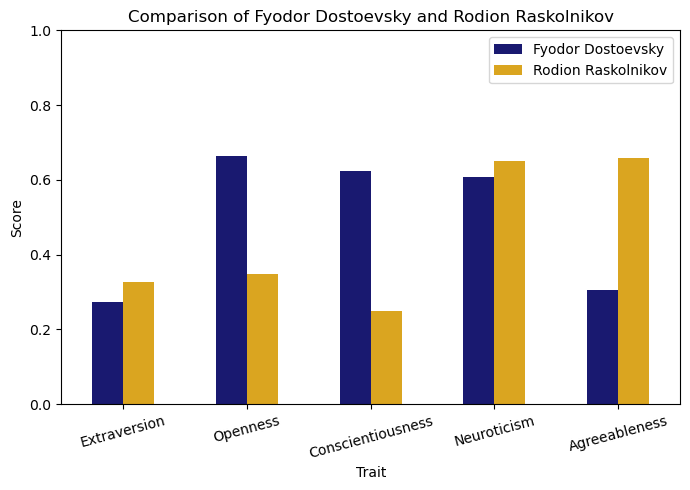

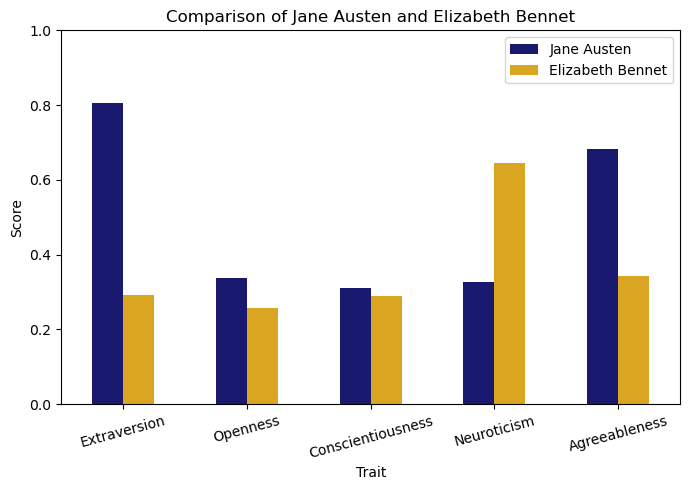

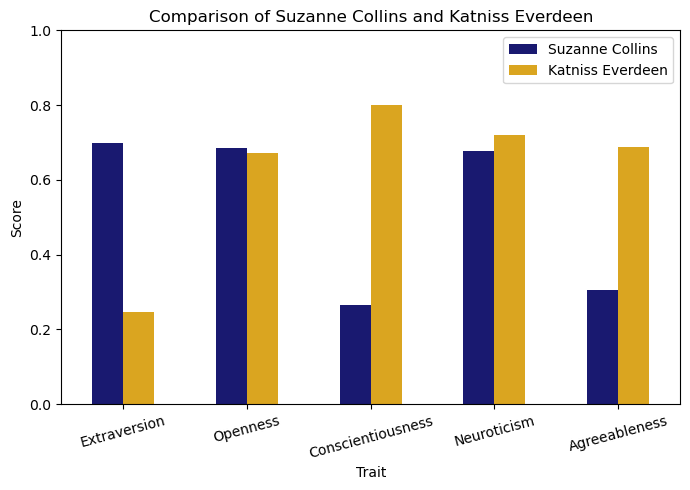

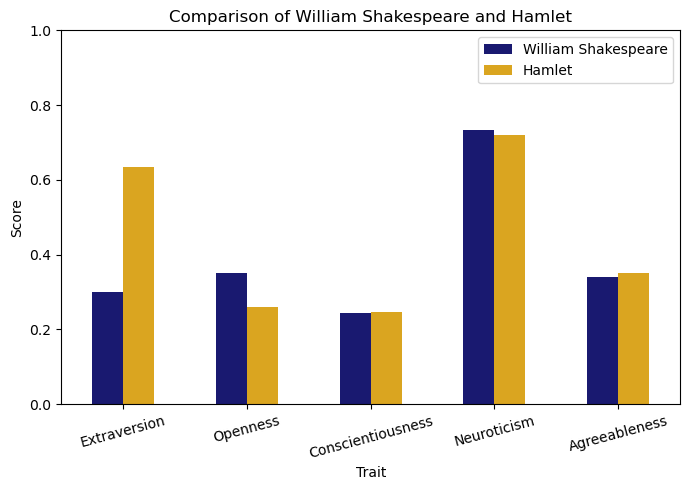

In [13]:
# STEP 5: Compare writer and protagonist on the Big Five traits

# Define pairs of IDs to compare (writer_id, protagonist_id)
comparison_pairs = [(3, 24), (5, 20), (6, 23), (7, 15), (11, 21), (14, 17)]

for id1, id2 in comparison_pairs:
    row1 = df[df["id"] == id1].squeeze()
    row2 = df[df["id"] == id2].squeeze()
    compare_two_individuals(row1, row2, comparison_dir)

We see that there are some overlap between individual writers and protagonists, but are they as groups similar? This is the next part of the analysis.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


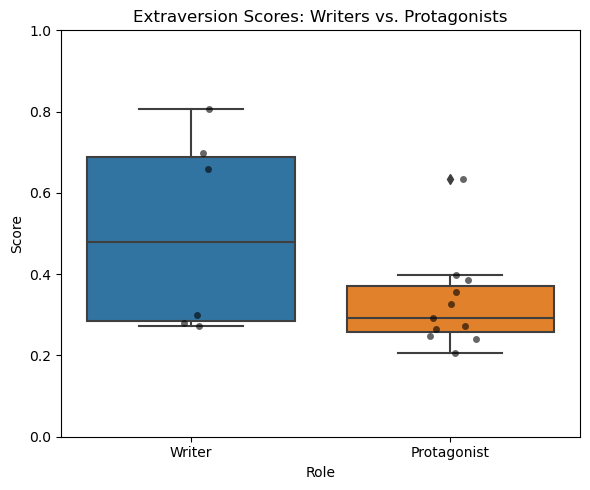

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


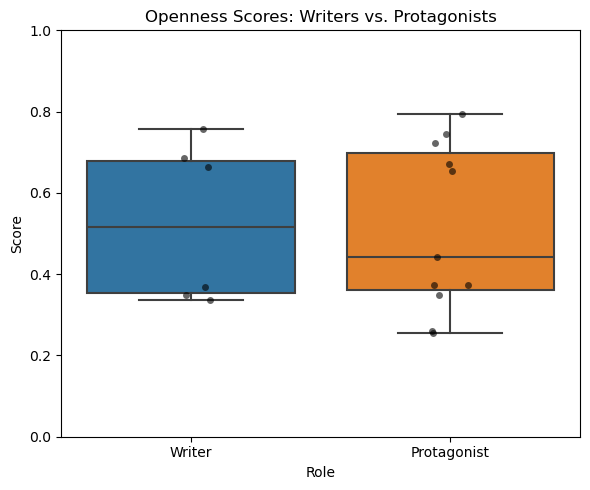

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


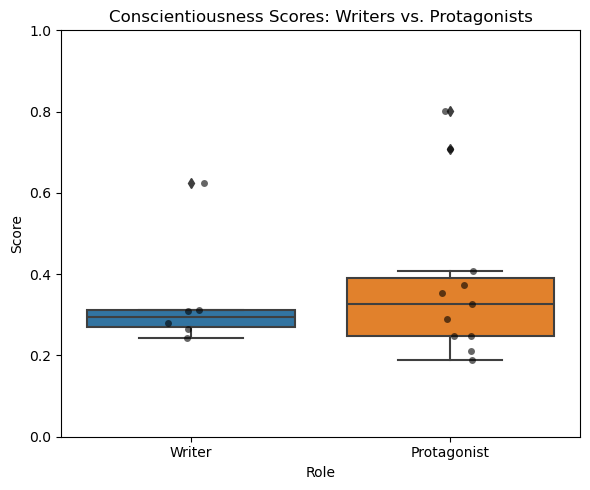

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


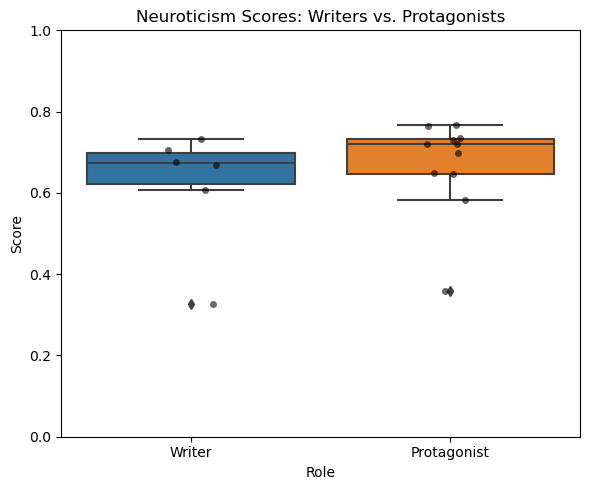

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


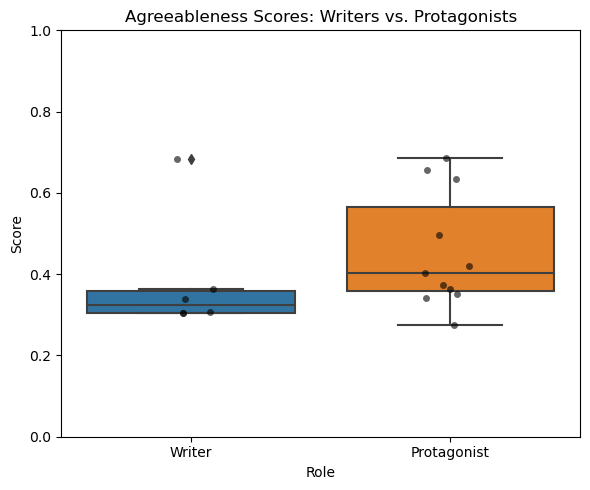

In [14]:
# STEP 6: Compare group trait scores between writers and protagonists
# Define writer and protagonist IDs
writer_ids = [3, 5, 6, 7, 11, 14]
protagonist_ids = list(range(15, 26))
protagonists_df = df[df["id"].isin(protagonist_ids)].copy()

# Create separate DataFrames
writers_df = df[df["id"].isin(writer_ids)].copy()
protagonists_df = df[df["id"].isin(protagonist_ids)].copy()

# Add type labels
writers_df["Role"] = "Writer"
protagonists_df["Role"] = "Protagonist"

# Combine into a single DataFrame
combined_df = pd.concat([writers_df, protagonists_df], ignore_index=True)
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Generate individual boxplots and scatter overlays for each trait, comparing distributions between writers and protagonists
for trait in main_traits:
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=combined_df, x="Role", y=trait, palette="tab10")
    sns.stripplot(data=combined_df, x="Role", y=trait, color='black', alpha=0.6, jitter=True)
    plt.title(f"{trait.title()} Scores: Writers vs. Protagonists")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.tight_layout()

    filename = f"w_vs_p_{trait}.png"
    plt.savefig(writers_dir / filename)
    plt.show()

From these plots, we can see that they do cluster together for certain traits and across groups. These plots can be found in bigfive_patterns/results/writers_vs_protagonists.

We can obtain a better overview of this data using a facet grid, as it makes it easier to see trends across the different pairs.

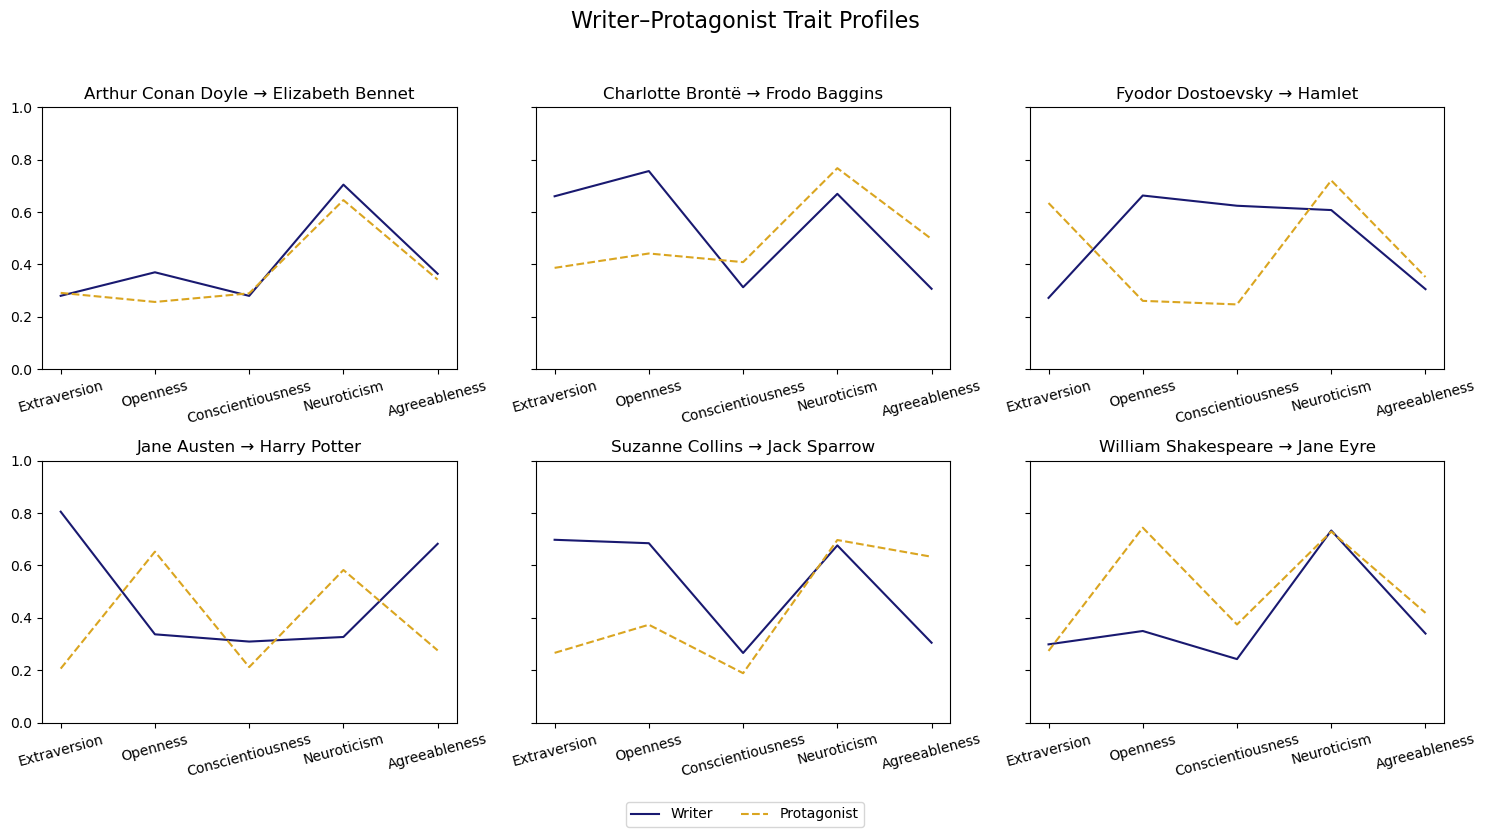

In [15]:
# Facet grid overview of individual writer–protagonist pairs
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axs = axs.flatten()

for ax, writer_id, protag_id in zip(axs, writer_ids, protagonist_ids):
    writer = df[df["id"] == writer_id].squeeze()
    protag = df[df["id"] == protag_id].squeeze()

    writer_name = get_name(writer, writer_id)
    protag_name = get_name(protag, protag_id)

    ax.plot(main_traits, writer[main_traits], label="Writer", color="midnightblue", linestyle='-')
    ax.plot(main_traits, protag[main_traits], label="Protagonist", color="goldenrod", linestyle='--')
    ax.set_title(f"{writer_name} → {protag_name}")
    ax.set_xticks(range(len(main_traits)))
    ax.set_xticklabels([t.capitalize() for t in main_traits], rotation=15)
    ax.set_ylim(0, 1)

fig.suptitle("Writer–Protagonist Trait Profiles", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.legend(labels=["Writer", "Protagonist"], loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=2)
fig.savefig(writers_dir / "w_vs_p_trends.png")
plt.show()

The final analysis is all about the protagonists. We will now look at whether protagonists as a category have similar personality profiles, or not. There are 11 protagonists included in this analysis.
We will first plot it as line plot. However, because it turns out to not be a very pleasant plot to look at, we will visualize it in a different manner subsequently.

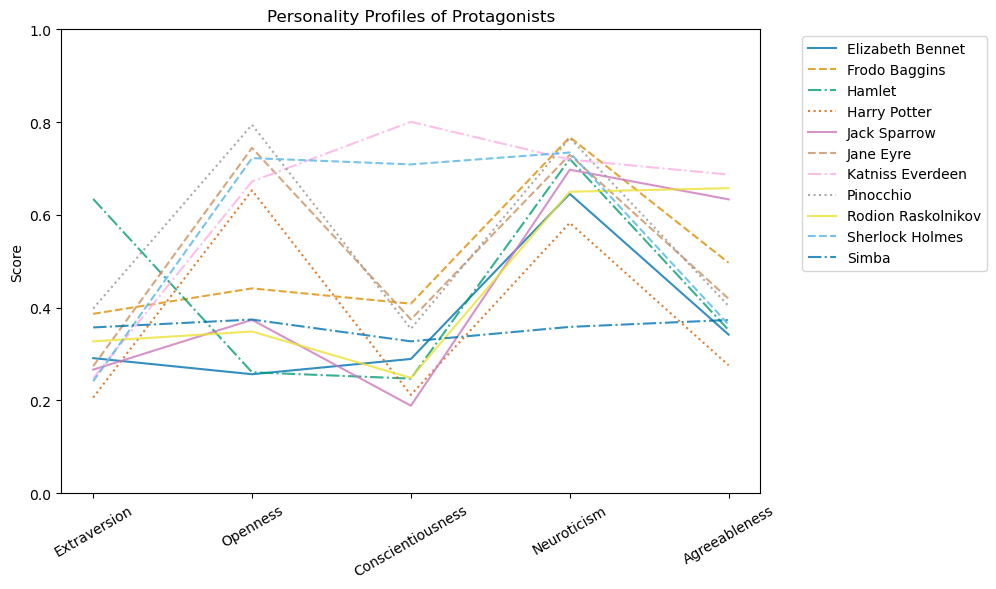

In [16]:
# STEP 7: Group-level trends of protagonists

# Colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=len(protagonists_df))

# Line styles to cycle through
line_styles = ["-", "--", "-.", ":"]

# Plot each protagonist's profile
plt.figure(figsize=(8, 6))
for idx, (_, row) in enumerate(protagonists_df.iterrows()):
    name = get_name(row, row["id"])
    style = line_styles[idx % len(line_styles)]
    plt.plot(main_traits, row[main_traits], label=name, color=palette[idx], linestyle=style, alpha=0.8)

plt.title("Personality Profiles of Protagonists")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(ticks=range(len(main_traits)), labels=[t.capitalize() for t in main_traits], rotation=30)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
output_path = protagonists_dir / "line_plot_of_protagonists.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

This plot can be found in bigfive_patterns/results/protagonists_patterns. Because we have many lines in this plot it becomes difficult to see any clear trends, except most are above average in neuroticism. Therefore, we will proceed with a different way of comparing the protagonists with a [PCA plot](https://en.wikipedia.org/wiki/Principal_component_analysis). In essence, this plot visualizes how different the protagonists are by seperating them in 2D space. Which means that, the more space there are between them, the more different the personalities are. So if the protagonists all share a similar personality, we expect them to cluster together.

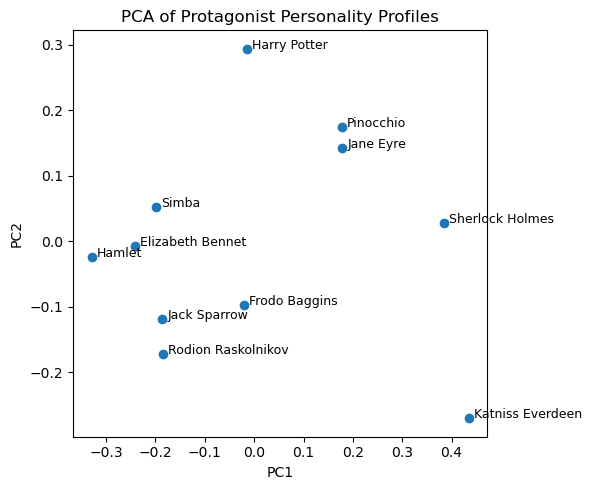

In [17]:
# PCA plot for visualizing variability of the protagonists

names = protagonists_df["name"] if "name" in protagonists_df else protagonists_df["id"]

# Prepare data
X = protagonists_df[main_traits].values

# Perform PCA on the main trait scores of protagonists to reduce dimensionality
pca = PCA(n_components=2)
proj = pca.fit_transform(X)

# Output directory for PCA plot
output_path = protagonists_dir / "pca_of_protagonists.png"

# PCA projection of protagonists
plt.figure(figsize=(6, 5))
plt.scatter(proj[:, 0], proj[:, 1])

# Label the points with protagonist's names
for i, label in enumerate(names):
    plt.text(proj[i, 0] + 0.01, proj[i, 1], str(label), fontsize=9)

plt.title("PCA of Protagonist Personality Profiles")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig(output_path)
plt.show()

This plot shows us that the protagonists vary a great deal in terms of personality and we do not see any clusters forming.

## Conclusion

In conclusion, we will summarize based on our project goals.
1. **Do protagonists reflect the personalities of their writers?**
We do not find enough evidence to conslude that they do reflect the personalities of the writers, even though it is worth noting that they often reflect similar values for two or more traits of the writer.
2. **Are protagonists psychologically alike?**
We do not find any evidence to support that they are alike. Rather, our findings suggest that protagonists vary a great deal in terms of personality.
3. **Is the Symanto API a reliable and valid tool for this kind of profiling?**
Both yes and no. As an approximate, it performs reasonably well and can be used to compare individuals and groups. However, we do see serious problems with certain trait correlations and facet correlations. I think the best way to describe it is as something that definitely should not be used in a clinical setting, but can be used in an informal setting for anyone curious about comparing personality differences across individuals or groups.